In [1]:
using LinearAlgebra
using SpecialFunctions

In [2]:
function J_0_rep(k, d , sign) #El signo determina si es la representación D^+ o D^-
    A = zeros(ComplexF64, d + 1, d + 1)

    for i in 0:d
        A[i+1,i+1] = (k/2 + i)
    end

    return sign * A
end

J_0_rep (generic function with 1 method)

In [3]:
J_0_rep(1,5,1)

6×6 Matrix{ComplexF64}:
 0.5+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.5+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  2.5+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  3.5+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  4.5+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  5.5+0.0im

$D_j^+$:  $\pi^j_{n',n}(J_2)=\frac{i}{2}[\sqrt{(k+n)(n+1)}\delta_{n',n+1}-\sqrt{n(n+k-1)}\delta_{n',n-1}]$

$D_j^-$:  $\pi^j_{n',n}(J_2)=-\frac{i}{2}[\sqrt{(k+n)(n+1)}\delta_{n',n+1}-\sqrt{n(n+k-1)}\delta_{n',n-1}]$

$k=-2j$ y $m=-(k/2+n)$ con $k=1,2,...$ y $n=0,1,2,...$

Revisar el signo

In [4]:
function J_2_rep(k, d, sign)  #El sign determina si es D_j^+ o D_j^-
    #j = -k/2 con k=1,2,3,...
    #m = sign(k/2+n) con n=0,1,2,3,...,d
    M = zeros(ComplexF64, d + 1, d + 1) # Matriz de (d+1 x d+1)
    
    for n in 0:d
        if n < d
            M[n+2, n+1] = -im / 2 * sqrt((k + n) * (n + 1)) 
        end
        if n > 0
            M[n, n+1] = im / 2 * sqrt(n * (k + n - 1)) 
        end
    end
    
    return sign * M
end

J_2_rep (generic function with 1 method)

In [5]:
J_2_rep(1,5,-1)

6×6 Matrix{ComplexF64}:
 -0.0-0.0im  -0.0-0.5im  -0.0-0.0im  -0.0-0.0im  -0.0-0.0im  -0.0-0.0im
 -0.0+0.5im  -0.0-0.0im  -0.0-1.0im  -0.0-0.0im  -0.0-0.0im  -0.0-0.0im
 -0.0-0.0im  -0.0+1.0im  -0.0-0.0im  -0.0-1.5im  -0.0-0.0im  -0.0-0.0im
 -0.0-0.0im  -0.0-0.0im  -0.0+1.5im  -0.0-0.0im  -0.0-2.0im  -0.0-0.0im
 -0.0-0.0im  -0.0-0.0im  -0.0-0.0im  -0.0+2.0im  -0.0-0.0im  -0.0-2.5im
 -0.0-0.0im  -0.0-0.0im  -0.0-0.0im  -0.0-0.0im  -0.0+2.5im  -0.0-0.0im

In [6]:
function jacobi_poly(n, α, β, z)
    if n == 0
        return 1.0
    elseif n == 1
        return 0.5 * ((α - β) + (α + β + 2) * z)
    end

    Pnm2 = 1.0
    Pnm1 = 0.5 * ((α - β) + (α + β + 2) * z)
    Pn = 0.0

    for k in 2:n
        a_k = 2.0 * k * (k + α + β) * (2k + α + β - 2)
        b_k = (2k + α + β - 1) * ((α^2 - β^2) + (2k + α + β) * (2k + α + β - 2) * z)
        c_k = 2.0 * (k + α - 1) * (k + β - 1) * (2k + α + β)
        d_k = (2k) * (k + α + β)

        Pn = (b_k * Pnm1 - c_k * Pnm2) / a_k
        Pnm2 = Pnm1
        Pnm1 = Pn
    end

    return Pn
end


jacobi_poly (generic function with 1 method)

In [7]:
#Ejemplo contrastado con la función JacobiP[1,1,-4,cosh(0.1)] de wolfram alpha
z=cosh(0.1)
jacobi_poly(1,1,-4,z)

1.9974979159720982

In [8]:
function B_plus(k, d, t)
    #j = -k/2 con k=1,2,3,...
    #m = -(k/2+l) con l=0,1,2,3,...,d
    #n = -(k/2+p) con p=0,1,...,d
    B = zeros(ComplexF64, d + 1, d + 1) # Matriz de (d+1 x d+1)
    
    for l in 0:d
        for p in 0:d
            if l <= p 
                B[l+1,p+1]=(cosh(t/2))^(-k-l-p) * (sinh(t/2))^(p-l) * jacobi_poly(l, p-l, -k-l-p, cosh(t))
            else
                B[l+1,p+1]=(-1)^(p-l)*(gamma(k+l)*gamma(p+1))/(gamma(k+p)*gamma(l+1)) * (cosh(t/2))^(-k-l-p) * (sinh(t/2))^(l-p) * jacobi_poly(p, l-p, -k-l-p, cosh(t))
            end
        end
    end
    
    return B
end

B_plus (generic function with 1 method)

In [9]:
θ = 0.001
d_max = 100
pi_J_0 = J_0_rep(1,d_max,-1)
exp(-im*θ*pi_J_0::AbstractMatrix) #Representación Π(K(θ))=exp(-iθπ(J_0)) truncada en d_max+1

101×101 Matrix{ComplexF64}:
 1.0+0.0005im       0.0+0.0im          0.0+0.0im     …       0.0+0.0im
 0.0+0.0im     0.999999+0.0015im       0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im     0.999997+0.0025im          0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im     …       0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im             0.0+0.0im
    ⋮                                                ⋱          ⋮
 0.0+0.0im          0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          0.0+0.0im      

In [10]:
Id = Matrix{ComplexF64}(I, d_max + 1, d_max + 1)

PI_A_0 = Id -im*θ*pi_J_0-0.5*θ^2*pi_J_0^2 #Aproximación de la serie de Taylor para e^(-iθπ(J_0))

101×101 Matrix{ComplexF64}:
 1.0+0.0005im       0.0+0.0im     …      0.0+0.0im         0.0+0.0im
 0.0+0.0im     0.999999+0.0015im         0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im     …      0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
    ⋮                             ⋱                           ⋮
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im          0.0+0.0im            0.0+0.0im         0.0+0.0im
 0.0+0.0im 

In [11]:
t = 0.01
k=2
pi_J_2 = J_2_rep(k,d_max,-1)
PI=exp(im*t*pi_J_2::AbstractMatrix) #Representación Π(A_2(t))=exp(-itπ(J_2)) truncada en d_max+1 
#parece que el signo debe ser +itπ(j_2) eso puede ser por π^r(J_2) no es lo mismo que π^l(J_2)

101×101 Matrix{ComplexF64}:
      0.999975+0.0im     0.00707083-0.0im  …  1.11208e-177+0.0im
   -0.00707083+0.0im         0.9999+0.0im     1.80983e-174-0.0im
    4.32995e-5+0.0im     -0.0122464+0.0im     1.66118e-171+0.0im
   -2.49988e-7+0.0im    0.000106057+0.0im     1.05641e-168-0.0im
    1.39746e-9+0.0im      -7.905e-7+0.0im     5.12968e-166+0.0im
  -7.65415e-12+0.0im     5.41215e-9+0.0im  …  2.02646e-163+0.0im
   4.13368e-14+0.0im   -3.50745e-11-0.0im     6.85705e-161+0.0im
  -2.20952e-16+0.0im    2.18727e-13+0.0im      2.0831e-158-0.0im
   1.17177e-18+0.0im   -1.32567e-15-0.0im     5.91672e-156+0.0im
  -6.17571e-21+0.0im    7.86022e-18+0.0im     1.61228e-153-0.0im
              ⋮                            ⋱              ⋮
  9.26444e-167+0.0im  -1.69102e-163-0.0im       7.40063e-8+0.0im
 -3.59196e-168+0.0im   6.11508e-165+0.0im       1.26282e-6-0.0im
  1.49113e-169+0.0im   -2.3958e-166-0.0im       1.86417e-5+0.0im
 -6.48149e-171+0.0im   1.00496e-167+0.0im  …   0.000233166-0.0im
  

In [12]:
PI_A_2 = Id +im*t*pi_J_2-0.5*t^2*pi_J_2^2 #Aproximación de la serie de Taylor para e^(-itπ(J_2))

101×101 Matrix{ComplexF64}:
    0.999975+0.0im   0.00707107+0.0im  …        0.0+0.0im       0.0+0.0im
 -0.00707107+0.0im       0.9999+0.0im           0.0+0.0im       0.0+0.0im
  4.33013e-5+0.0im   -0.0122474+0.0im           0.0+0.0im       0.0+0.0im
         0.0+0.0im  0.000106066+0.0im           0.0+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im           0.0+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im  …        0.0+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im           0.0+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im           0.0+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im           0.0+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im           0.0+0.0im       0.0+0.0im
            ⋮                          ⋱                           ⋮
         0.0+0.0im          0.0+0.0im           0.0+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im           0.0+0.0im       0.0+0.0im
         0.0+0.

In [13]:
B=B_plus(k, d_max, t)

101×101 Matrix{ComplexF64}:
      0.999975+0.0im     0.00499983+0.0im  …  7.88184e-231+0.0im
   -0.00999967+0.0im         0.9999+0.0im     1.57634e-226+0.0im
    7.49969e-5+0.0im     -0.0149988+0.0im     1.56055e-222+0.0im
   -4.99975e-7+0.0im    0.000149988+0.0im     1.01954e-218+0.0im
    3.12482e-9+0.0im    -1.24989e-6+0.0im     4.94468e-215+0.0im
  -1.87488e-11+0.0im     9.37413e-9+0.0im  …  1.89872e-211+0.0im
   1.09367e-13+0.0im   -6.56184e-11+0.0im      6.0125e-208+0.0im
  -6.24948e-16+0.0im    4.37453e-13+0.0im     1.61475e-204+0.0im
    3.5153e-18+0.0im   -2.81218e-15+0.0im     3.75422e-201+0.0im
  -1.95293e-20+0.0im     1.7576e-17+0.0im     7.67512e-198+0.0im
              ⋮                            ⋱              ⋮
  1.87663e-210+0.0im  -1.72647e-206+0.0im       7.08114e-8+0.0im
 -9.48398e-213+0.0im   8.81995e-209+0.0im        1.2139e-6+0.0im
   4.7924e-215+0.0im  -4.50478e-211+0.0im       1.79961e-5+0.0im
  -2.4214e-217+0.0im   2.30029e-213+0.0im  …   0.000225922+0.0im
  

In [ ]:
diag(PI,1)

In [ ]:
diag(PI_A_2,0)

In [ ]:
diag(B,1)

In [17]:
using SymPy

In [18]:
function B_plus_sym(k,l,p,t)
    expr = 0
    if l <= p 
        expr=(sympy.cosh(t/2))^(-float(k+l+p)) * (sympy.sinh(t/2))^(float(p-l)) * jacobi_poly(l, p-l, -k-l-p, sympy.cosh(t))
    else
        expr=(-1)^(p-l)*(gamma(k+l)*gamma(p+1))/(gamma(k+p)*gamma(l+1)) * (sympy.cosh(t/2))^(-float(k+l+p)) * (sympy.sinh(t/2))^(float(l-p)) * jacobi_poly(p, l-p, -k-l-p, sympy.cosh(t))
    end 
    return sqrt((gamma(l+1)*gamma(k+p))/(gamma(p+1)*gamma(k+l))) * expr
end

B_plus_sym (generic function with 1 method)

In [30]:
@syms t
B_plus_sym(2, 0, 0, t)

        -2.0/t\
1.0*cosh    |-|
            \2/

In [20]:
B_plus_sym(2, 1, 0, t)

                     1.0/t\     -3.0/t\
-1.4142135623731*sinh   |-|*cosh    |-|
                        \2/         \2/

In [21]:
using TaylorSeries

t = Taylor1(2)


 1.0 t + 𝒪(t³)

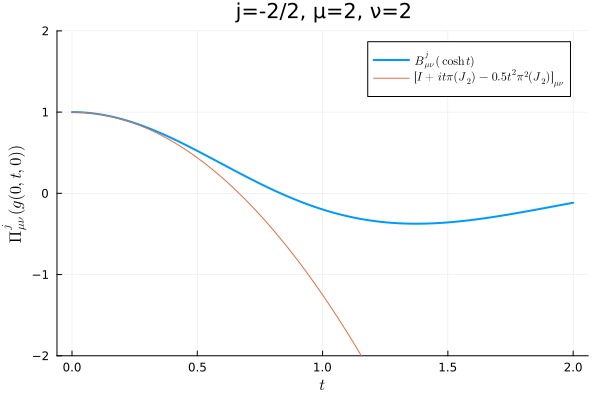

In [22]:
using Plots  
using LaTeXStrings

# Define a range of input values for visualization
d = 100
k = 2
l = 2
p = 2
t_values = 0:0.01:2

j_2 = J_2_rep(k,d,-1)
#Parece que el signo en la construcción de j_2 tengo algo mal porque deberia ser e^(-im*t*j_2)
#aproximation(t)=exp(im*t*j_2::AbstractMatrix)

Id = Matrix{ComplexF64}(I, d + 1, d + 1)
approx(t) = Id +im*t*j_2-0.5*t^2*j_2^2

# Compute the output of B_plus_sym for each t value
results_1 = [B_plus_sym(k, l, p, t) for t in t_values]
#results2 = [real(aproximation(t)[l+1,p+1]) for t in t_values]
results_2 = [real(approx(t)[l+1,p+1]) for t in t_values]

# Plot the results
#pyplot() para cambia un poco el formato al usado en python
plot(t_values, results_1, label=L"B_{\mu \nu}^{j}(\cosh{t})", xlabel=L"t", ylabel=L"\Pi_{\mu \nu}^j(g(0,t,0))", title="j=-$k/2, μ=$l, ν=$p", lw=2)
plot!(t_values, results_2, label=L"[I +it\pi(J_2)-0.5t^2\pi^2(J_2)]_{\mu \nu}", lw=1)
#plot!(t_values, results3, label="approx_2")
ylims!(-2,2)

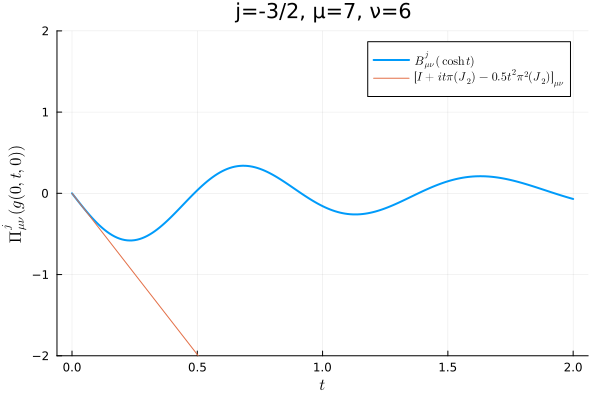

In [28]:
j_2 = J_2_rep(3,d,-1)
#Parece que el signo en la construcción de j_2 tengo algo mal porque deberia ser e^(-im*t*j_2)
#aproximation(t)=exp(im*t*j_2::AbstractMatrix)

Id = Matrix{ComplexF64}(I, d + 1, d + 1)
approx(t) = Id +im*t*j_2-0.5*t^2*j_2^2
# Compute the output of B_plus_sym for each t value
results_1_0 = [B_plus_sym(3, 7, 6, t) for t in t_values]
#results2 = [real(aproximation(t)[l+1,p+1]) for t in t_values]
results_2_0 = [real(approx(t)[7+1,6+1]) for t in t_values]

# Plot the results
#pyplot() para cambia un poco el formato al usado en python
plot(t_values, results_1_0, label=L"B_{\mu \nu}^{j}(\cosh{t})", xlabel=L"t", ylabel=L"\Pi_{\mu \nu}^j(g(0,t,0))", title="j=-3/2, μ=7, ν=6", lw=2)
plot!(t_values, results_2_0, label=L"[I +it\pi(J_2)-0.5t^2\pi^2(J_2)]_{\mu \nu}", lw=1)
#plot!(t_values, results3, label="approx_2")
ylims!(-2,2)